<a href="https://colab.research.google.com/github/Ranjan234/FINAL-PROJECT-MAVEN-MUSIC/blob/main/FINAL_PROJECT_MAVEN_MUSIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RECAP: THE COURSE PROJECT
 #  THE SITUATION:
 * You’ve just been hired as a Jr. Data Scientist for Maven Music, a streaming service
that’s been losing more customers than usual the past few months and would like
to use data science to figure out how to reduce customer churn
 # THE ASSIGNMENT:
 * You’ll have access to data on Maven Music’s customers, including subscription
details and music listening history
 Your task is to gather, clean, and explore the data to provide insights about the
recent customer churn issues, then prepare it for modeling in the future
 # THE OBJECTIVES:
 1. Scope the data science project
 2. Gather the data in Python
 3. Clean the data
 4. Explore & visualize the data
 5. Prepare the data for modeling



# FINAL PROJECT: MAVEN MUSIC
 1. Revisit the project scope
 2. Read the data files into Python
 3. Clean the data by converting data types,
resolving data issues, and creating new columns
 4. Explore the data independently, then join the
tables for further exploration
 5. Create a non-null, numeric DataFrame and
engineer features that could be good predictors
of customer churn
 6. Visualize and interpret the data in the final
DataFrame that is ready for modeling

 # Gather Data
  * customer data:maven_music_customers
  * listing_history :maven_music_listing

In [5]:
# Read in the customer data
import pandas as pd
customers = pd.read_csv('maven_music_customers.csv')

In [7]:
customers.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [6]:
# Read in the listing history
listing = pd.read_excel('/content/maven_music_listening_history.xlsx')
listing.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [ ]:
# where might you find listing history data beyond the ID's?
# Check the other sheets in the Excel spreadsheets.

In [10]:
# Read in the audio data
audio = pd.read_excel("/content/maven_music_listening_history.xlsx", sheet_name = 1)

In [11]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [8]:
# Read the session data
sessions = pd.read_excel("/content/maven_music_listening_history.xlsx", sheet_name = 2)
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


# Clean the Data
* Convert Data Types
- Check the Data types of the data in the tables and convert to numeric and datetime values as necessary.

In [12]:
# Check the customers data types
customers.dtypes

,0
Customer ID,int64
Customer Name,object
Email,object
Member Since,object
Subscription Plan,object
Subscription Rate,object
Discount?,object
Cancellation Date,object


In [13]:
# Chaeck the listing history data
listing.dtypes

,0
Customer ID,int64
Session ID,int64
Audio Order,int64
Audio ID,int64
Audio Type,object


In [14]:
# Check the audio data types
audio.dtypes

,0
ID,object
Name,object
Genre,object
Popularity,int64


In [ ]:
# Check the sessions data types
sessions.dtypes

,0
Session ID,int64
Session Log In Time,datetime64[ns]


In [ ]:
customers.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [63]:
# Convert object to numeric and datetime fields
customers['Member Since'] =pd.to_datetime(customers['Member Since'])
customers['Subscription Rate'] =pd.to_numeric(customers['Subscription Rate'].str.replace('$',''))
customers['Cancellation Date']= pd.to_datetime(customers['Cancellation Date'])

/tmp/ipython-input-2533406905.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Member Since'] =pd.to_datetime(customers['Member Since'])
/tmp/ipython-input-2533406905.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Cancellation Date']= pd.to_datetime(customers['Cancellation Date'])


In [66]:
customers.dtypes

,0
Customer ID,int64
Customer Name,object
Email,object
Member Since,datetime64[ns]
Subscription Plan,object
Subscription Rate,float64
Discount?,object
Cancellation Date,datetime64[ns]
Cancelled,int64


# Resolve Data Issues
- Check for missing data, inconsistent test and types, duplicate data and outliers.

In [64]:
# Missing data
# Find the NAN values in the data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  30 non-null     object        
 5   Subscription Rate  29 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
 8   Cancelled          30 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 2.2+ KB


In [65]:
# No of NAN values listing history
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [ ]:
# no of NAN values audio
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [15]:
# No of NAN in sessions
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [67]:
# The customers dataframe has null values in the field suscription plan, Discount? and Cancellation date
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,nious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT,0
1,5002,Aria Keys,ious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT,0
2,5004,Lyric Bell,mical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01,1
3,5267,Rock Bassett,y.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT,0
4,5338,Rhythm Dixon,.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT,0


In [16]:
# Look into in subscription plan- all NAN plans are $2.99.
customers[customers['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,3/20/23,NaN,$2.99,NaN,6/3/23
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,3/28/23,NaN,$2.99,NaN,NaN


In [68]:
#Check the unique subscription rates
customers[['Subscription Plan', 'Subscription Rate']].drop_duplicates()

,Subscription Plan,Subscription Rate
0,Basic (Ads),2.99
6,Premium (No Ads),9.99
15,Premium (No Ads),NaN
21,Premium (No Ads),7.99


In [17]:
# It looks like the $2.99 rate is for basic plan, so fill missing subscription plan values with 'Basic'.
customers['Subscription Plan'] = customers['Subscription Plan'].fillna('Basic (Ads)')

In [ ]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT


In [69]:
# Look into discount
customers[['Customer ID', 'Discount?']].tail()

,Customer ID,Discount?
25,7224,Yes
26,7401,Yes
27,7579,NaN
28,7581,Yes
29,7583,Yes


In [18]:
#Let's view it another way -- NAN seems to mean No
customers['Discount?'].value_counts()

,count
Discount?,
Yes,7


In [70]:
# let's change to numeric to make our life easier
import numpy as np

In [71]:
customers['Discount?'] = np.where(customers['Discount?'] == 'Yes', 1, 0)
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,nious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,ious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,mical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,y.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


 * Inconsistent tests and typo


In [19]:
# Look at customers - the subscription rate looks highly
customers.describe()

,Customer ID
count,30.000000
mean,6276.333333
std,814.255587
min,5001.000000
25%,5759.500000
50%,6196.000000
75%,6823.500000
max,7583.000000


In [72]:
# Looks into the 99.99 -- looks like a typo
customers[customers['Subscription Rate'] > 7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
6,5581,Reed Sharp,.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,ird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
8,5761,Sonata Nash,al.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,0
12,6029,Chord Campbell,ell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
14,6163,Melody Parks,of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT,0


In [20]:
# fix the 99.99 typo
customers.iloc[15, 5] = 9.99

In [21]:
# Check the data range of customers
customers['Member Since'].max()

'5/8/23'

In [22]:
# Look at listing_history
listing.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [23]:
# View the data
listing.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [24]:
# Look at the audio type values
listing['Audio Type'].value_counts()

,count
Audio Type,
Song,463
Podcast,42


In [25]:
# look at the data
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [26]:
#Look into audio genre
audio.Genre.value_counts()

,count
Genre,
Pop Music,3
Comedy,3
Hip Hop,3
Country,2
Pop,2
Jazz,2
True Crime,2


In [30]:
import numpy as np

# Pop and Pop music should be mapped to the same value
audio['Genre'] = np.where(audio['Genre'] == 'Pop music', 'Pop', audio['Genre'])
audio

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [29]:
# Look at log in time range
sessions['Session Log In Time'].max()

Timestamp('2023-05-31 06:03:00')

* Duplicate Rows

In [31]:
customers[customers.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [ ]:
listing[listing.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [73]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


In [74]:
sessions[sessions.duplicated()]

,Session ID,Session Log In Time


* Outliers

In [75]:
customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date,Cancelled
count,30.000000,30,29.000000,30.000000,13,30.000000
mean,6276.333333,2023-04-10 06:24:00,5.403793,0.233333,2023-06-01 16:36:55.384615424,0.433333
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00,0.000000
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00,0.000000
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00,0.000000
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00,1.000000
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000,2023-06-03 00:00:00,1.000000
std,814.255587,NaN,2.994247,0.430183,NaN,0.504007


In [76]:
listing.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [32]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [77]:
sessions.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


 # Create New Columns
  * create two new column that useful for EDA and moeling
   - Cancelled: Whether a customer cancelled or not
   - Email: Remove the 'Email' from the email address

In [33]:
customers.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,Basic (Ads),$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,Basic (Ads),$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,Basic (Ads),$2.99,NaN,NaN


In [87]:
# Create 'cancelled' column
customers['Cancelled'] = np.where(customers['Cancellation Date'].isna(), 0, 1)
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,ria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,ythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [79]:
# Create a updated email column without the email:portion
customers['Email'] = customers['Email'].str[6:]

In [ ]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,nious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,ious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,mical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,y.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


# EDA
  * Try to better understand who cancelled?
    - How long were they members before they cancelled.
    - What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [36]:
customers.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,nious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,ious.aria@email.edu,3/13/23,Basic (Ads),$2.99,NaN,NaN
2,5004,Lyric Bell,mical.lyric@email.com,3/13/23,Basic (Ads),$2.99,NaN,6/1/23
3,5267,Rock Bassett,y.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,.by.rhythm@email.edu,3/20/23,Basic (Ads),$2.99,NaN,NaN


In [80]:
# View the customers who cancelled.
customers[customers['Cancellation Date'].notna()].head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,mail.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,rol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,ordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,nny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1


In [81]:
# How long were they customers numbers before they canceled
# About 1.5 months but that night just because we have 3 months of date
(customers['Cancellation Date'] - customers['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [82]:
# calculate the cancellation rate for those who had a discount
discount_yes = customers[customers['Discount?'] == 1]
discount_yes

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,iano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,a@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,armony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
28,7581,Lyric Keys,@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-03,1
29,7583,Melody Singer,ger@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-01,1


In [83]:
# Cancellation rate for those who had a discount
discount_yes.Cancelled.sum() / discount_yes.Cancelled.count()

np.float64(0.8571428571428571)

In [89]:
# calculate the cancellation rate for those who did not have a discount
discount_no = customers[customers['Discount?'] == 0]
discount_no.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,ria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,ythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [90]:
# Cancellation rate for those who did not have a discount
discount_no.Cancelled.sum() / discount_no.Cancelled.count()

np.float64(0.30434782608695654)

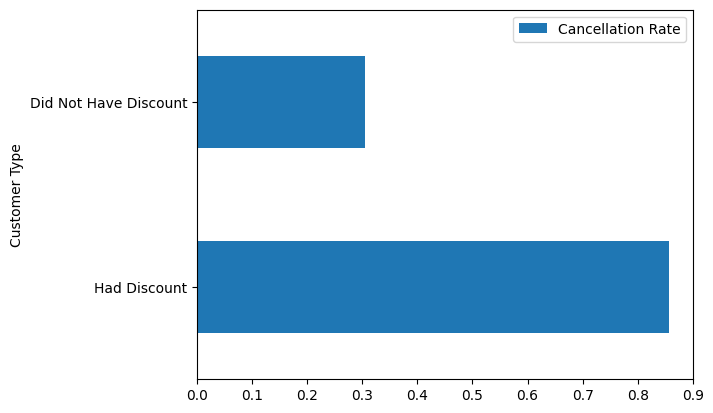

In [91]:
# Visualize the cancellation rate for those with a discount vs those without discount -- this is a good insight
pd.DataFrame([['Had Discount', 0.8571428571428571],
              ['Did Not Have Discount', 0.30434782608695654]],
                 columns = ['Customer Type', 'Cancellation Rate']).plot.barh(x = 'Customer Type', y = 'Cancellation Rate');

 * Better understand the customers listing histories:
     *

In [92]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,ria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,ythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [42]:
listing.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [ ]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [43]:
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [44]:
# Split the ID in the audio so the column can be joined with other table
audio_clean = pd.DataFrame(audio.ID.str.split('-').to_list()).rename(columns = {0: 'Type', 1: 'Audio ID'})
audio_clean.head()

,Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105


In [45]:
#Add the new fields to the original audio table
audio_all = pd.concat([audio_clean, audio], axis = 1)
audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop Music,5
3,Song,104,Song-104,Glowing Hearts,Pop Music,10
4,Song,105,Song-105,Pop Rocks,Pop Music,52


In [46]:
listing.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [93]:
# if you wil try to join on the audio_ID, you will get an error
df = listing.merge(audio_all, how ='left', on = 'Audio ID')
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop Music,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop Music,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop Music,52


In [49]:
# check the data type of ausio_id in the audio table
audio_all.dtypes

,0
Type,object
Audio ID,object
ID,object
Name,object
Genre,object
Popularity,int64


In [51]:
# Change the audio_id to an int type instead of object
audio_all['Audio ID'] = audio_all['Audio ID'].astype(int)
audio_all.head()


,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop Music,5
3,Song,104,Song-104,Glowing Hearts,Pop Music,10
4,Song,105,Song-105,Pop Rocks,Pop Music,52


In [53]:
# Try merge again
df = listing.merge(audio_all, how ='left', on = 'Audio ID')
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop Music,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop Music,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop Music,52


In [55]:
df.groupby('Customer ID')['Session ID']

<Axes: ylabel='Frequency'>

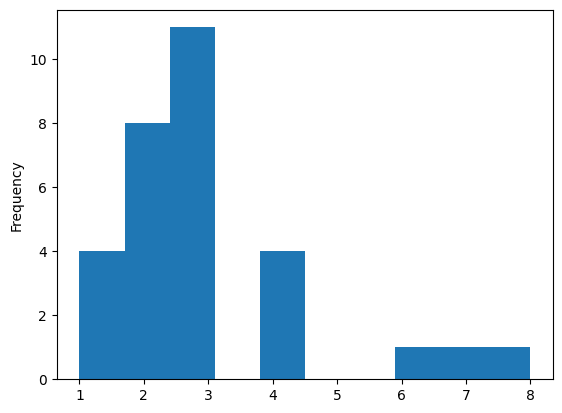

In [54]:
# The number of listing sessions that each customer had in the past 3 months
df.groupby('Customer ID')['Session ID'].nunique().plot.hist()

In [56]:
# The most popular genre that customers listing to
df.Genre.value_counts()

,count
Genre,
Pop Music,167
Pop,100
Hip Hop,88
Country,68
Jazz,48
Comedy,19
True Crime,15


# Prepare For DataModeling
 Create a DataFrame
   * CustomerID
   * Whether a customer cancel or not
   * Whether a customer received a discount or not
   * The number of listing sessions
   * Percent of listing history consisting of pop
   * Percent of listing history consisting of podcasts

In [94]:
# Create a Dataframe ready for modeling
model_df = customers[['Customer ID', 'Cancelled', 'Discount?']]
model_df.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [97]:
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop Music,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop Music,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop Music,52


In [98]:
df.groupby('Customer ID')['Session ID'].nunique()

,Session ID
Customer ID,
5001,8
5002,4
5004,1
5267,7
5338,4
5404,1
5581,3
5759,2
5761,3


In [99]:
# Calculate the number of listing sessions for each customers
number_of_sessions = df.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()
number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [100]:
# Add it to the model dataframe
model_df = model_df.merge(number_of_sessions, how ='left', on='Customer ID')
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [101]:
df.Genre

,Genre
0,Pop
1,Pop
2,Pop Music
3,Pop Music
4,Pop Music
...,...
500,Jazz
501,Comedy
502,Hip Hop
503,Hip Hop


In [102]:
#Calculate dummy variables for esch genre
genre_dummies = pd.get_dummies(df.Genre)
genre_dummies.head()

,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime
0,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False


In [103]:
# combine it with customer id
pd.concat([df['Customer ID'], pd.get_dummies(df.Genre)], axis = 1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime
0,5001,False,False,False,False,True,False,False
1,5001,False,False,False,False,True,False,False
2,5001,False,False,False,False,False,True,False
3,5001,False,False,False,False,False,True,False
4,5001,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
500,7579,False,False,False,True,False,False,False
501,6588,True,False,False,False,False,False,False
502,5763,False,False,True,False,False,False,False
503,5763,False,False,True,False,False,False,False


In [104]:
# group it by customer
genres = pd.concat([df['Customer ID'], pd.get_dummies(df.Genre)], axis = 1).groupby('Customer ID').sum().reset_index()
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime
0,5001,0,0,26,0,12,22,0
1,5002,0,22,0,0,0,0,0
2,5004,0,0,0,0,3,6,0
3,5267,0,0,22,0,7,16,0
4,5338,0,18,0,0,0,0,0


In [105]:
listing.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [106]:
# Add a column for total songs / podcasts listened to
total_audio = listing.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()
total_audio.head()


,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [108]:
#Create a master audio table to calculate percentage
df_audio = genres.merge(total_audio, how = 'left', on = 'Customer ID')
df_audio.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime,Total Audio
0,5001,0,0,26,0,12,22,0,60
1,5002,0,22,0,0,0,0,0,22
2,5004,0,0,0,0,3,6,0,9
3,5267,0,0,22,0,7,16,0,45
4,5338,0,18,0,0,0,0,0,18


In [109]:
# percent pop
model_df['Percent Pop'] = df_audio['Pop'] / df_audio['Total Audio'] * 100
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop
0,5001,0,0,8,20.000000
1,5002,0,0,4,0.000000
2,5004,1,0,1,33.333333
3,5267,0,0,7,15.555556
4,5338,0,0,4,0.000000


In [110]:
# Per cent podcasts
model_df['Percent Podcasts'] = (df_audio['Comedy'] + df_audio['True Crime'] / df_audio['Total Audio']) * 100
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop,Percent Podcasts
0,5001,0,0,8,20.000000,0.0
1,5002,0,0,4,0.000000,0.0
2,5004,1,0,1,33.333333,0.0
3,5267,0,0,7,15.555556,0.0
4,5338,0,0,4,0.000000,0.0


In [111]:
model_df

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop,Percent Podcasts
0,5001,0,0,8,20.000000,0.000000
1,5002,0,0,4,0.000000,0.000000
2,5004,1,0,1,33.333333,0.000000
3,5267,0,0,7,15.555556,0.000000
4,5338,0,0,4,0.000000,0.000000
5,5404,1,0,1,25.000000,0.000000
6,5581,0,0,3,0.000000,100.000000
7,5759,1,0,2,33.333333,0.000000
8,5761,0,0,3,0.000000,100.000000
9,5763,0,0,6,25.806452,0.000000


* Visualize the relationship  in the modeling DataFrame using the pairplot
  - What are some of your obsrevations?
  - What variables might do a good job predicting customer cancellation?
  

In [113]:
import seaborn as sns

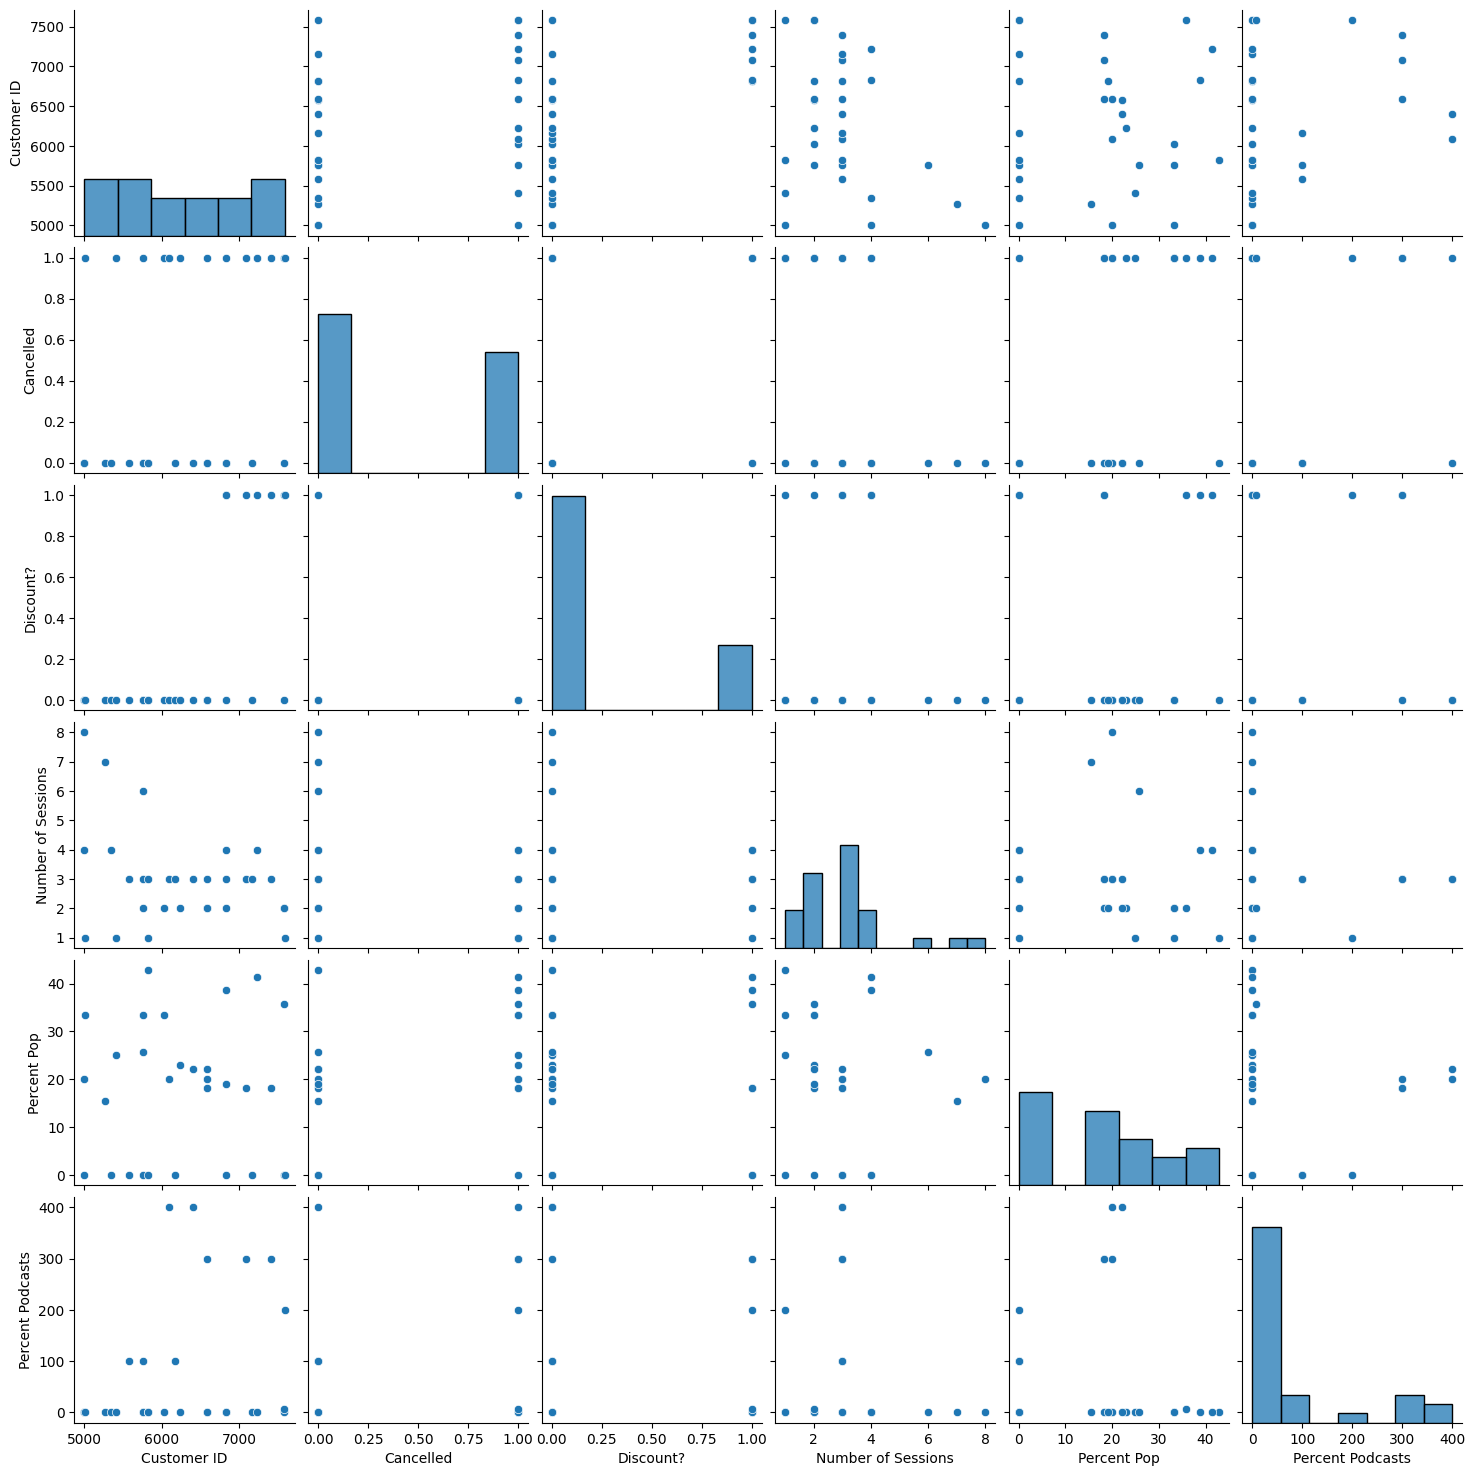

In [114]:
sns.pairplot(model_df);

In [115]:
# Look at the correlations
model_df.corr()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop,Percent Podcasts
Customer ID,1.000000,0.269942,0.648514,-0.337083,0.017478,0.255543
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.532302,0.287621
Discount?,0.648514,0.471825,1.000000,-0.048877,0.163351,0.178761
Number of Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.098457,-0.065348
Percent Pop,0.017478,0.532302,0.163351,-0.098457,1.000000,-0.084939
Percent Podcasts,0.255543,0.287621,0.178761,-0.065348,-0.084939,1.000000


In [116]:
# Observations
## A discount is correlated with a cancellation
## The more listening sessions, the fewer cancellation
## The more pop musinc, the more cancellations
## Podcasts listening history seems unrelated to cancellations